In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from xgboost_pspfgp import XGBoost_pspfgp

In [2]:
PATH = PATH = "../../../../data-mining-file/"
levels = ("0-4","5-12","13-22")

In [3]:
with open(PATH+"train_dfs_std_pca.pickle", "rb") as f:
    train_dfs_std_pca = pickle.load(f)
    
with open(PATH+"train_dfs_std_vif.pickle", "rb") as f:
    train_dfs_std_vif = pickle.load(f)
    
with open(PATH+"train_dfs_min_max.pickle", "rb") as f:
    train_dfs_min_max = pickle.load(f)

targets = pd.read_csv(PATH+"target.csv")

In [4]:
targets

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1
...,...,...,...,...
424111,22100215342220508_q18,1,22100215342220508,18
424112,22100215460321130_q18,1,22100215460321130,18
424113,22100217104993650_q18,1,22100217104993650,18
424114,22100219442786200_q18,1,22100219442786200,18


## Model using train_dfs_std_vif

In [5]:
train_dfs_std_vif = pd.concat(list(train_dfs_std_vif.values()),axis=0)

In [6]:
train_dfs_std_vif.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,elapsed_time_mean,level_mean,room_coor_x_mean,screen_coor_x_mean,elapsed_time_std,level_std,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,-0.005362,2.532688,1.202695,-0.039852,-0.079568,-0.132072,0.139675,-0.038590,-0.407178,...,0.110090,0.392205,-0.711961,-0.363307,1.387493,0.104626,-0.221368,1.074705,-0.077762,-0.035390
20090312431273200,13-22,-0.965213,-1.225996,-0.794791,-0.148806,-1.001298,-0.175949,-0.500241,-0.103123,-0.063506,...,-0.619295,0.050337,-0.847091,-0.426296,-0.471561,-0.080507,-0.669318,-1.117707,-0.053486,-0.143873
20090312431273200,5-12,-0.758225,-1.309504,-0.663615,-0.086738,-0.382479,0.196550,-0.121065,-0.064560,-0.240080,...,-0.355071,-0.586939,-0.160505,-0.431481,-0.448512,-0.268072,-0.131348,-0.943662,-0.070378,-0.086861
20090312433251036,0-4,1.030250,-0.754522,-0.831174,-0.038879,-0.559258,-1.829169,-1.976488,-0.036973,-0.380722,...,-0.714072,-0.712037,0.337737,-0.039301,0.721910,-1.303249,0.529767,0.126273,-0.077762,-0.035577
20090312433251036,13-22,0.554489,0.000000,2.453582,-0.104029,-0.091134,1.601282,0.014185,-0.053006,-3.373130,...,2.317225,1.221533,-0.370402,2.196682,0.000000,0.953647,0.000000,0.352272,-0.053486,-0.014198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.030250,-0.754522,-0.831174,-0.039575,-0.535272,-1.281908,-1.251695,-0.039156,1.288924,...,0.110090,-0.159916,-0.187112,-0.525310,-0.609256,0.104626,0.529767,-0.347944,-0.077762,-0.035155
22100219442786200,5-12,0.673060,-0.710282,-0.663615,-0.085164,-0.204002,-0.171017,-0.442521,-0.063177,0.489977,...,-0.551759,-1.101962,-0.553014,-0.541719,-0.353402,-0.268072,-0.315366,-0.943662,-0.070378,-0.086646
22100221145014656,5-12,0.673060,1.087383,0.918826,0.004318,0.501220,0.721745,0.018441,0.041829,0.641854,...,0.759493,1.129805,-0.160505,1.596884,-0.163183,-0.268072,0.236689,-0.406933,-0.070378,0.046313


In [7]:
clf_vif = XGBoost_pspfgp()

In [8]:
%%time

clf_vif.fit(train_dfs_std_vif, targets,name="vif")

#########################
### Fold 1
#########################
1(172), 2(114), 3(165), 4(190), 5(162), 6(120), 7(133), 8(94), 9(179), 10(202), 11(96), 12(135), 13(254), 14(220), 15(186), 16(71), 17(100), 18(150), 
#########################
### Fold 2
#########################
1(151), 2(188), 3(128), 4(201), 5(110), 6(103), 7(108), 8(47), 9(131), 10(102), 11(87), 12(111), 13(90), 14(157), 15(209), 16(135), 17(72), 18(114), 
#########################
### Fold 3
#########################
1(167), 2(127), 3(142), 4(201), 5(123), 6(123), 7(140), 8(69), 9(120), 10(130), 11(82), 12(92), 13(106), 14(174), 15(254), 16(58), 17(108), 18(209), 
#########################
### Fold 4
#########################
1(111), 2(140), 3(88), 4(296), 5(144), 6(184), 7(122), 8(72), 9(113), 10(85), 11(122), 12(91), 13(141), 14(218), 15(173), 16(61), 17(70), 18(158), 
#########################
### Fold 5
#########################
1(175), 2(145), 3(214), 4(172), 5(153), 6(189), 7(131), 8(65), 9(121), 10(150), 11(115

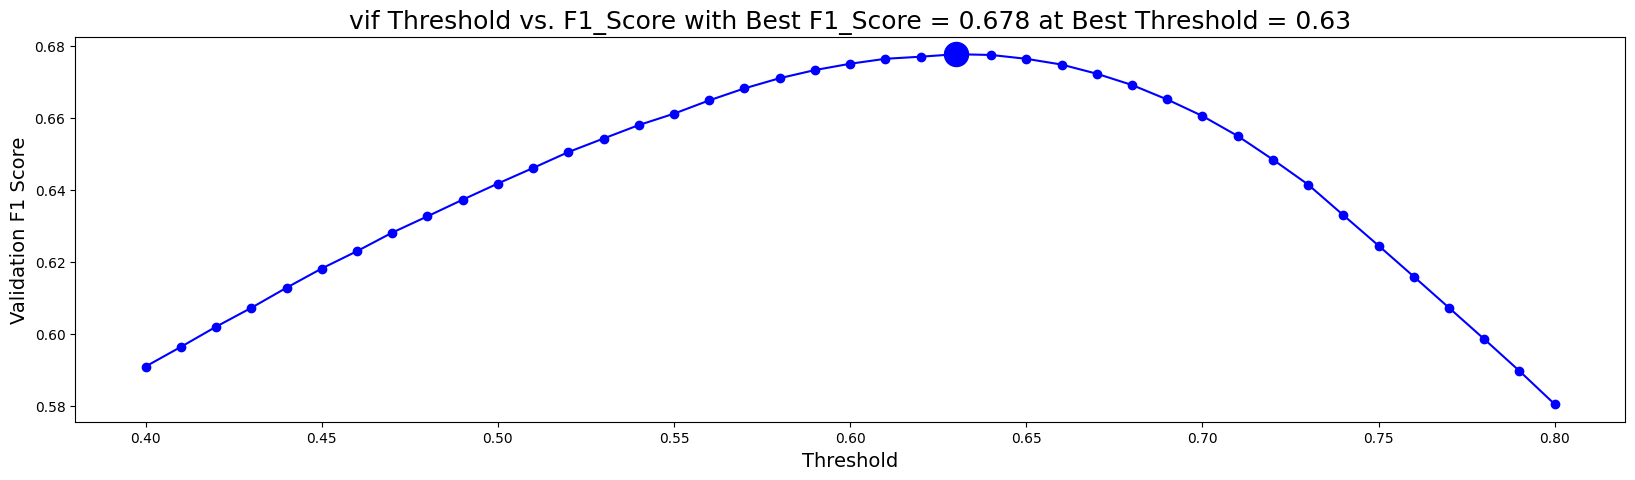

In [9]:
clf_vif.eval_()

In [10]:
clf_vif.f1()

When using optimal threshold...
Q1: F1 = 0.5950973724766307
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.48418282841334914
Q4: F1 = 0.6095328023761051
Q5: F1 = 0.572140768448795
Q6: F1 = 0.6071621067728364
Q7: F1 = 0.5865815760792247
Q8: F1 = 0.5341339394849419
Q9: F1 = 0.5987456457053518
Q10: F1 = 0.5153672450875163
Q11: F1 = 0.5885662632410591
Q12: F1 = 0.482529682624984
Q13: F1 = 0.430429975425367
Q14: F1 = 0.6085979958494605
Q15: F1 = 0.510879710497774
Q16: F1 = 0.4606612372210271
Q17: F1 = 0.5416477402641442
Q18: F1 = 0.4881938964780805
==> Overall F1 = 0.677662321520028


## Model using train_dfs_std_PCA

In [11]:
train_dfs_std_pca = pd.concat(list(train_dfs_std_pca.values()),axis=0)
train_dfs_std_pca.sort_index()

,level_group,PC1,PC2,PC3,PC4,PCA5,PCA6,PCA7,PCA8
session_id,,,,,,,,,
20090312431273200,0-4,-0.377238,3.243531,-0.064443,0.225996,-1.998894,-1.068821,-1.390852,-0.023556
20090312431273200,13-22,3.389079,0.494591,-1.460651,0.779441,0.239163,0.037290,-0.341602,-0.228984
20090312431273200,5-12,2.593357,0.068804,-0.615491,0.708380,-0.305940,-0.713534,0.240895,-0.803303
20090312433251036,0-4,0.868446,-1.420645,-0.611651,-2.482628,-0.549174,1.176884,-0.800145,-0.626824
20090312433251036,13-22,-2.584098,1.403760,0.755186,0.875735,-1.771781,0.331121,2.830981,-0.484396
...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,0.515955,-1.841131,1.857991,-2.789697,0.844123,-0.923586,-1.132844,-0.411511
22100219442786200,5-12,0.620648,-2.897973,1.290353,-0.925083,0.510969,-0.656993,-0.966286,-0.492499
22100221145014656,5-12,-1.613143,0.900163,0.660308,-0.303388,-0.864094,-0.182560,0.596654,1.067851


In [12]:
clf_pca = XGBoost_pspfgp()

In [13]:
%%time

clf_pca.fit(train_dfs_std_pca, targets,name="pca")

#########################
### Fold 1
#########################
1(157), 2(105), 3(146), 4(208), 5(119), 6(206), 7(72), 8(114), 9(165), 10(165), 11(123), 12(103), 13(139), 14(179), 15(103), 16(66), 17(44), 18(92), 
#########################
### Fold 2
#########################
1(122), 2(175), 3(101), 4(151), 5(140), 6(128), 7(140), 8(83), 9(137), 10(129), 11(128), 12(138), 13(95), 14(163), 15(136), 16(85), 17(88), 18(113), 
#########################
### Fold 3
#########################
1(148), 2(139), 3(144), 4(122), 5(105), 6(154), 7(113), 8(61), 9(171), 10(96), 11(86), 12(76), 13(90), 14(123), 15(163), 16(73), 17(95), 18(136), 
#########################
### Fold 4
#########################
1(115), 2(127), 3(90), 4(210), 5(94), 6(116), 7(88), 8(78), 9(173), 10(63), 11(119), 12(111), 13(163), 14(85), 15(107), 16(85), 17(62), 18(128), 
#########################
### Fold 5
#########################
1(134), 2(168), 3(98), 4(133), 5(134), 6(111), 7(123), 8(88), 9(104), 10(73), 11(82), 12(131

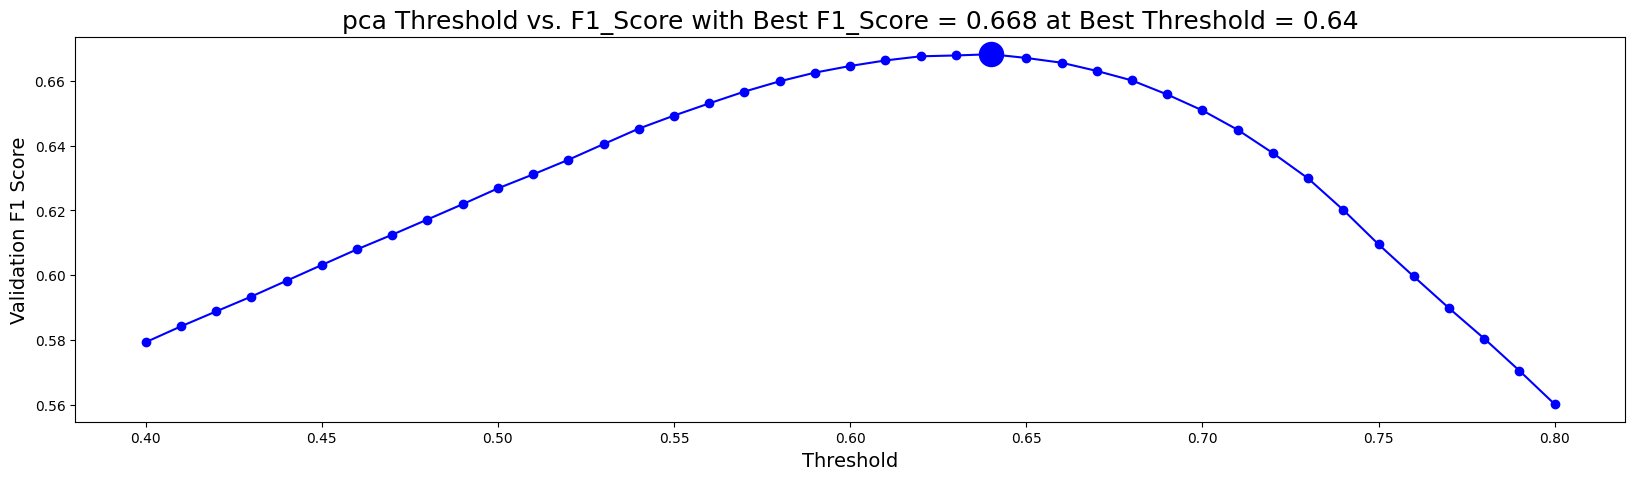

In [14]:
clf_pca.eval_()

In [15]:
clf_pca.f1()

When using optimal threshold...
Q1: F1 = 0.5566032262461578
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.48359123391510933
Q4: F1 = 0.5696790840273048
Q5: F1 = 0.5136217745217868
Q6: F1 = 0.5899890639413878
Q7: F1 = 0.562392738415973
Q8: F1 = 0.5177409930043844
Q9: F1 = 0.5821987985868147
Q10: F1 = 0.4109151344925766
Q11: F1 = 0.5742434509111176
Q12: F1 = 0.4754729093763121
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5773851543235669
Q15: F1 = 0.36942360446256917
Q16: F1 = 0.44471618442533134
Q17: F1 = 0.512097139596756
Q18: F1 = 0.48907328840853054
==> Overall F1 = 0.6682640211122512


## Model using train_dfs_min_max

In [16]:
train_dfs_min_max = pd.concat(list(train_dfs_min_max.values()),axis=0)
train_dfs_min_max.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,text_nunique,elapsed_time_mean,level_mean,page_mean,room_coor_x_mean,room_coor_y_mean,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,0.75,0.454545,1.000000,0.500000,0.303929,0.488587,0.000000,0.475571,0.396077,...,0.474576,0.625000,0.181818,0.217391,0.666667,0.111111,0.008333,0.571429,0.333333,0.275041
20090312431273200,13-22,0.50,0.263158,0.000000,0.242857,0.272340,0.247621,0.672727,0.465605,0.569862,...,0.204396,0.473684,0.148936,0.224490,0.254545,0.044444,0.006061,0.000000,0.000000,0.165203
20090312431273200,5-12,0.50,0.200000,0.333333,0.305085,0.274705,0.418475,0.000000,0.548904,0.441038,...,0.258373,0.263889,0.200000,0.170455,0.300000,0.015625,0.006536,0.000000,0.000000,0.179508
20090312433251036,0-4,1.00,0.363636,0.500000,0.181818,0.346100,0.392133,0.500000,0.135113,0.486854,...,0.203390,0.375000,0.545455,0.391304,0.500000,0.000000,0.016667,0.285714,0.333333,0.263627
20090312433251036,13-22,1.00,0.526316,0.500000,0.457143,0.654184,0.488783,0.754545,0.819475,0.668064,...,0.323077,0.763158,0.255319,0.306122,0.345455,0.088889,0.242424,0.666667,0.000000,0.324579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.00,0.363636,0.500000,0.318182,0.315935,0.396956,0.666667,0.244900,0.071257,...,0.474576,0.500000,0.363636,0.130435,0.166667,0.111111,0.016667,0.142857,0.333333,0.289374
22100219442786200,5-12,1.00,0.333333,0.333333,0.169492,0.297345,0.461872,0.708333,0.475557,0.194442,...,0.172249,0.138889,0.000000,0.113636,0.333333,0.015625,0.004902,0.000000,0.000000,0.182472
22100221145014656,5-12,1.00,0.733333,0.666667,0.661017,0.439401,0.633347,0.602273,0.653707,0.507021,...,0.746411,0.680556,0.200000,0.227273,0.400000,0.015625,0.009804,0.200000,0.000000,0.335324


In [17]:
clf_mm = XGBoost_pspfgp()

In [18]:
%%time

clf_mm.fit(train_dfs_min_max, targets,name="min_max")

#########################
### Fold 1
#########################
1(137), 2(116), 3(185), 4(189), 5(194), 6(253), 7(88), 8(89), 9(152), 10(273), 11(115), 12(149), 13(158), 14(158), 15(286), 16(68), 17(56), 18(105), 
#########################
### Fold 2
#########################
1(173), 2(185), 3(113), 4(190), 5(143), 6(163), 7(105), 8(65), 9(217), 10(123), 11(154), 12(147), 13(86), 14(163), 15(141), 16(159), 17(73), 18(173), 
#########################
### Fold 3
#########################
1(202), 2(138), 3(129), 4(212), 5(207), 6(81), 7(147), 8(61), 9(166), 10(198), 11(116), 12(73), 13(102), 14(121), 15(256), 16(143), 17(71), 18(133), 
#########################
### Fold 4
#########################
1(143), 2(154), 3(98), 4(188), 5(135), 6(198), 7(134), 8(69), 9(174), 10(101), 11(108), 12(110), 13(109), 14(145), 15(220), 16(63), 17(74), 18(161), 
#########################
### Fold 5
#########################
1(157), 2(126), 3(219), 4(183), 5(151), 6(147), 7(186), 8(58), 9(154), 10(167), 11(7

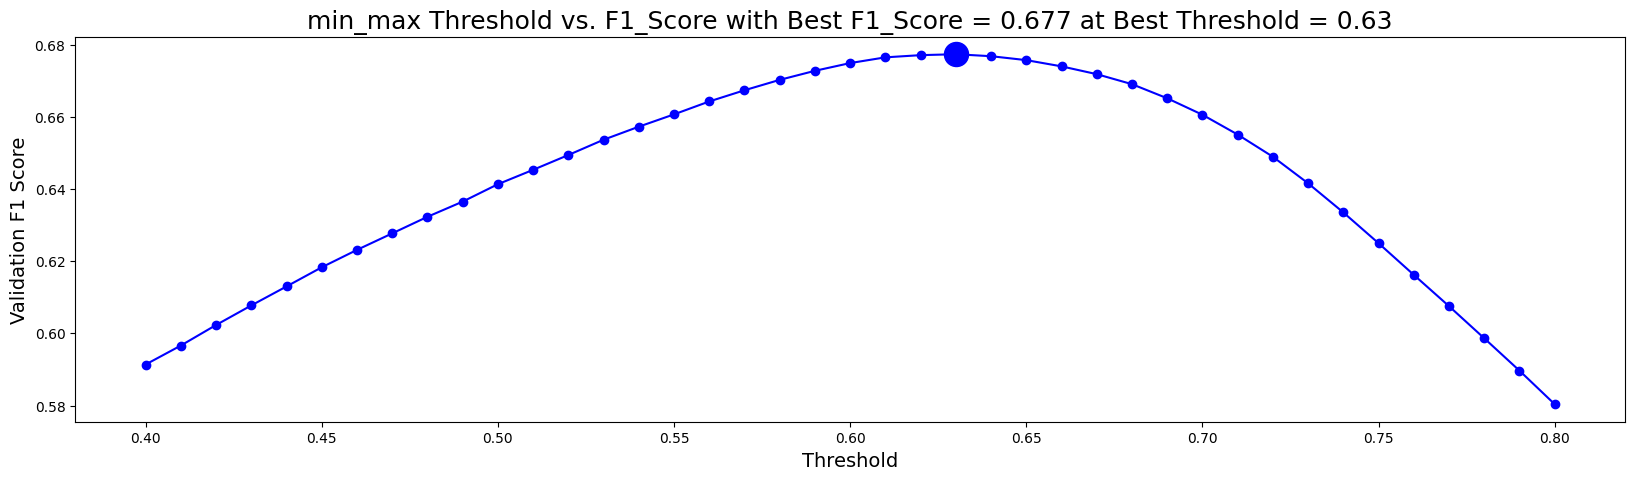

In [19]:
clf_mm.eval_()

In [20]:
clf_mm.f1()

When using optimal threshold...
Q1: F1 = 0.5907032898109243
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.48483240350906237
Q4: F1 = 0.6147976329387952
Q5: F1 = 0.5747247445649621
Q6: F1 = 0.6077145631946838
Q7: F1 = 0.5828058554830736
Q8: F1 = 0.5326967581248667
Q9: F1 = 0.5984476687320625
Q10: F1 = 0.522673794147763
Q11: F1 = 0.5877218280957025
Q12: F1 = 0.4896491219575269
Q13: F1 = 0.4342641899175459
Q14: F1 = 0.6077266746850994
Q15: F1 = 0.507439942469025
Q16: F1 = 0.46248337423835706
Q17: F1 = 0.5381405204572732
Q18: F1 = 0.4881938964780805
==> Overall F1 = 0.6773383591038813
